# Lab 2.07 - Univariate Analysis

## Exercise 7 - Australian Athletes (ais)

Import all necessary Python libraries and load the AIS dataset from lab exercise 1.01. Also include the code for setting the index and conversion to categorical variables!

In [3]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

ais = pd.read_csv('../data/ais.csv')
ais.head()

,id,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
0,1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
1,2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
2,3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
3,4,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
4,5,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball


Use an appropriate chart type to visualise the following variables. Are several chart types suitable? Make one of each! Note how some graphs nevertheless give a better insight into the data than other types of graphs.

- `sex`
- `sport`
- `ht` (show this also divided by `sex` and by `sport`.)

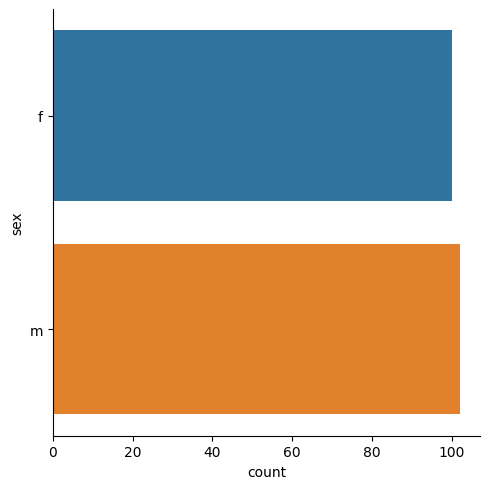

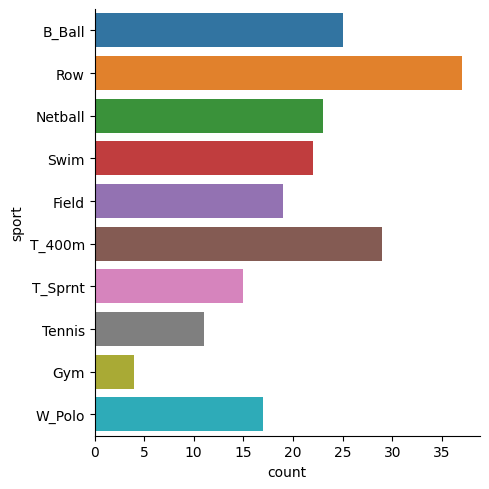

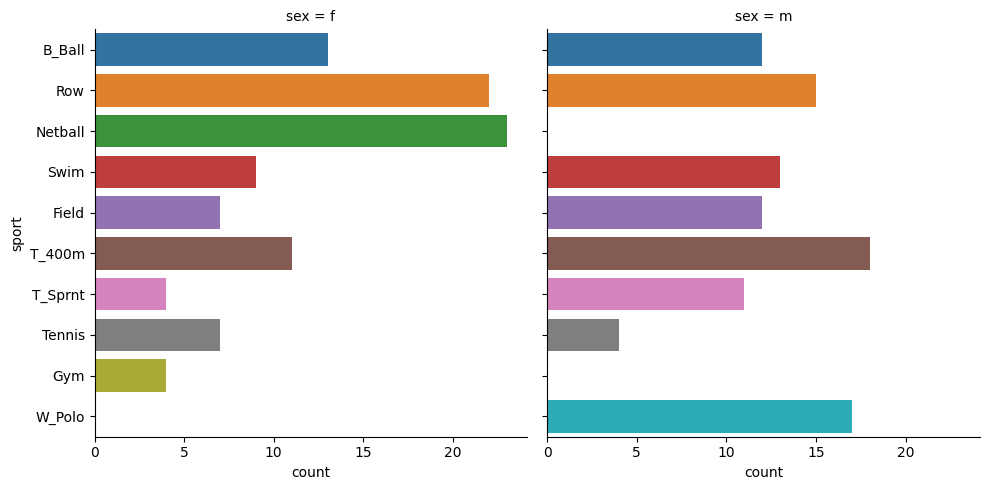

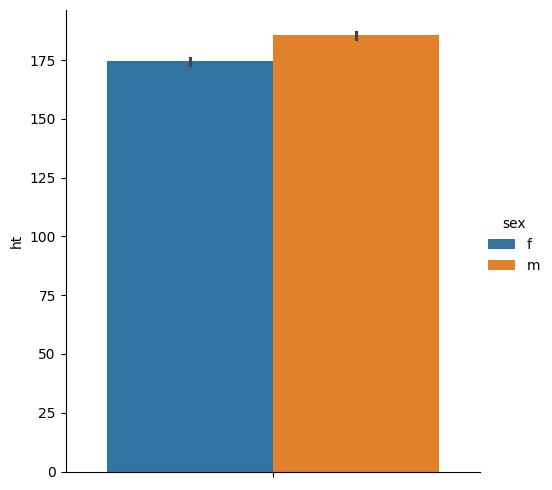

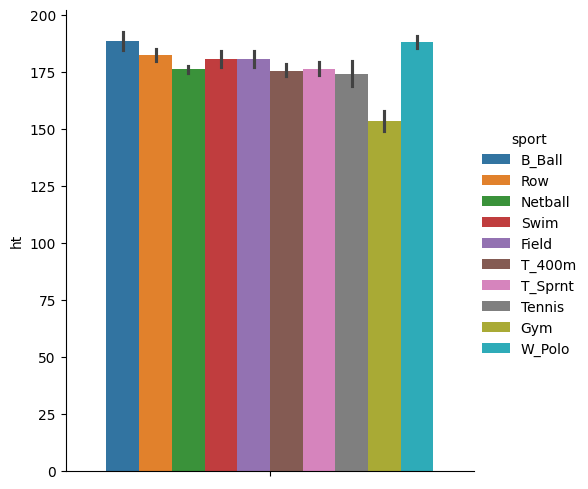

In [14]:
# Bar chart in Seaborn: catplot() with 'kind = "count"'', hue varies the used color
sns.catplot(data = ais, kind = "count", y = "sex", hue='sex')
sns.catplot(data = ais, kind = "count", y = "sport", hue='sport')
sns.catplot(data = ais, kind = "count",col='sex', y = "sport", hue='sport')
sns.catplot(data = ais, kind = "bar", y = "ht", hue='sex')
sns.catplot(data = ais, kind = "bar", y = "ht", hue='sport')

<Axes: xlabel='ht', ylabel='Density'>

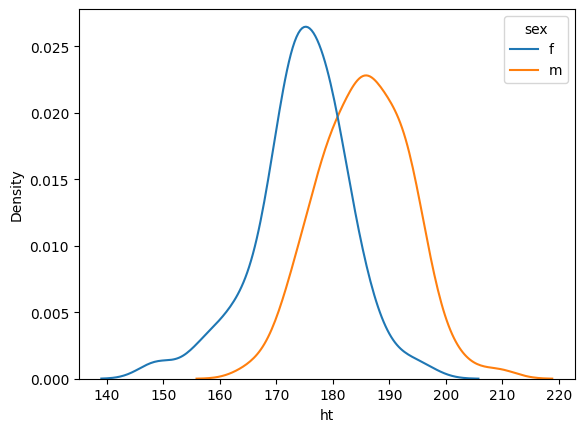

In [26]:
sns.kdeplot(x = ais["ht"],hue=ais['sex'])


<Axes: xlabel='ht', ylabel='sex'>

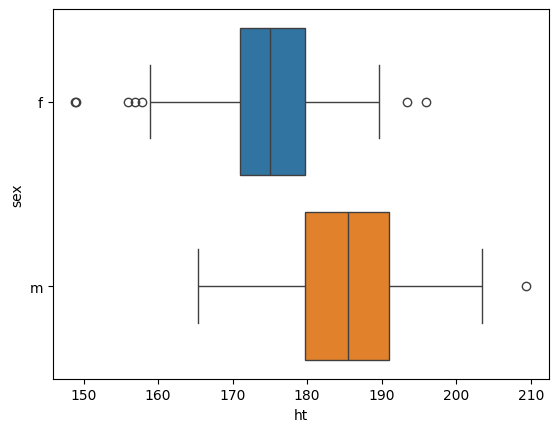

In [25]:
sns.boxplot(data = ais, x=ais['ht'], y=ais['sex'],hue='sex')

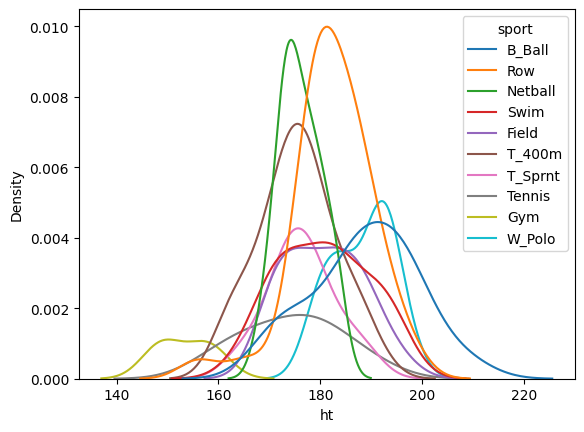

In [33]:
sns.kdeplot(data = ais, x=ais['ht'], hue='sport');

<Axes: xlabel='ht', ylabel='sport'>

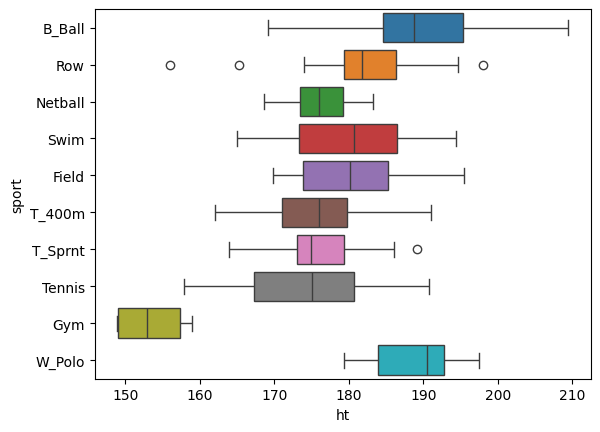

In [34]:
sns.boxplot(data = ais, x=ais['ht'], y=ais['sport'],hue='sport')

Select the following subsets from the dataset and calculate for each the appropriate measures of central tendency (and, when possible, dispersion) of the variables `ht` and `sex`:

1. the rowers
2. the rowers, netball and tennis players together
3. the female basketball players and rowers together

In [107]:
rowers = ais[ais['sport'] == 'Row']
rnt = ais[ais['sport'].isin(['Row','Tennis','Netball'])]
fem_br = ais[(ais['sport'].isin(['Row','B_Ball'])) & (ais['sex'] == 'f')]

fem_br

frame = pd.DataFrame(rowers['ht'].describe())

frame.insert(1,'Selection2',rnt['ht'].describe().values)
frame.insert(2,'Selection3',fem_br['ht'].describe().values)
frame
# frame.assign(fem_br['ht'].describe())
# frame.columns = ['Selection1','Selection2','Selection3']


,ht,Selection2,Selection3
count,37.000000,71.000000,35.000000
mean,182.375676,179.066197,180.125714
std,7.798376,7.936371,7.144078
min,156.000000,156.000000,156.000000
25%,179.300000,174.250000,177.400000
50%,181.800000,179.500000,179.700000
75%,186.300000,183.400000,184.650000
max,198.000000,198.000000,195.900000


## Check your answers

As a check, here are the results of the last question. First the frequencies and mode of the variable `sex`:

|           | Selection 1 | Selection 2 | Selection 3 |
| :-------- | :---------- | :---------- | :---------- |
| **f**     | 22          | 52          | 35          |
| **m**     | 15          | 19          | 0           |
| **mode**  | f           | f           | f           |

Then the relevant measures for central tendency and dispersion for `ht` (max. 3 decimal places):

| Statistic  | Selection 1 | Selection 2 | Selection 3 |
| :--------- | :---------- | :---------- | :---------- |
| mean       | 182.376     | 179.066     | 180.126     |
| stdev      | 7.798       | 7.936       | 7.144       |
| min        | 156         | 156         | 156         |
| Q1         | 179.3       | 174.25      | 177.4       |
| median     | 181.8       | 179.5       | 179.7       |
| Q3         | 186.3       | 183.4       | 184.65      |
| max        | 198         | 198         | 195.9       |
| IQR        | 7           | 9.15        | 7.250       |